<a href="https://colab.research.google.com/github/hema-001/myGoogleColabs/blob/master/PVD_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Apr 26 14:51:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.2/530.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 25.8 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/datasets/bike.zip" -d "/content/bike" 

Archive:  /content/drive/MyDrive/datasets/bike.zip
   creating: /content/bike/bike/
  inflating: /content/bike/bike/data.yaml  
   creating: /content/bike/bike/test/
   creating: /content/bike/bike/test/images/
  inflating: /content/bike/bike/test/images/161.jpg  
  inflating: /content/bike/bike/test/images/163.jpg  
  inflating: /content/bike/bike/test/images/165.jpg  
  inflating: /content/bike/bike/test/images/169.jpg  
  inflating: /content/bike/bike/test/images/170.jpg  
  inflating: /content/bike/bike/test/images/171.jpg  
  inflating: /content/bike/bike/test/images/172.jpg  
  inflating: /content/bike/bike/test/images/173.jpg  
  inflating: /content/bike/bike/test/images/174.jpg  
  inflating: /content/bike/bike/test/images/175.jpg  
  inflating: /content/bike/bike/test/images/177.jpg  
  inflating: /content/bike/bike/test/images/179.jpg  
  inflating: /content/bike/bike/test/images/181.jpg  
  inflating: /content/bike/bike/test/images/182.jpg  
  inflating: /content/bike/bike/t

In [6]:
!ls "/content/bike"
!ls "/content/bike/bike"

bike
data.yaml  test  train	val


In [7]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")

results = model.train(data="/content/bike/bike/data.yaml", epochs=25, imgsz=640)

100%|██████████| 49.7M/49.7M [00:00<00:00, 74.1MB/s]
Ultralytics YOLOv8.0.87 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/bike/bike/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

In [8]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.87 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/bike/bike/val/labels.cache... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]
                   all         81        107      0.938      0.869      0.939      0.783
               bicycle         81         54      0.905      0.889      0.922      0.806
             motorbike         81         53      0.972      0.849      0.956      0.759
Speed: 7.7ms preprocess, 28.6ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/val


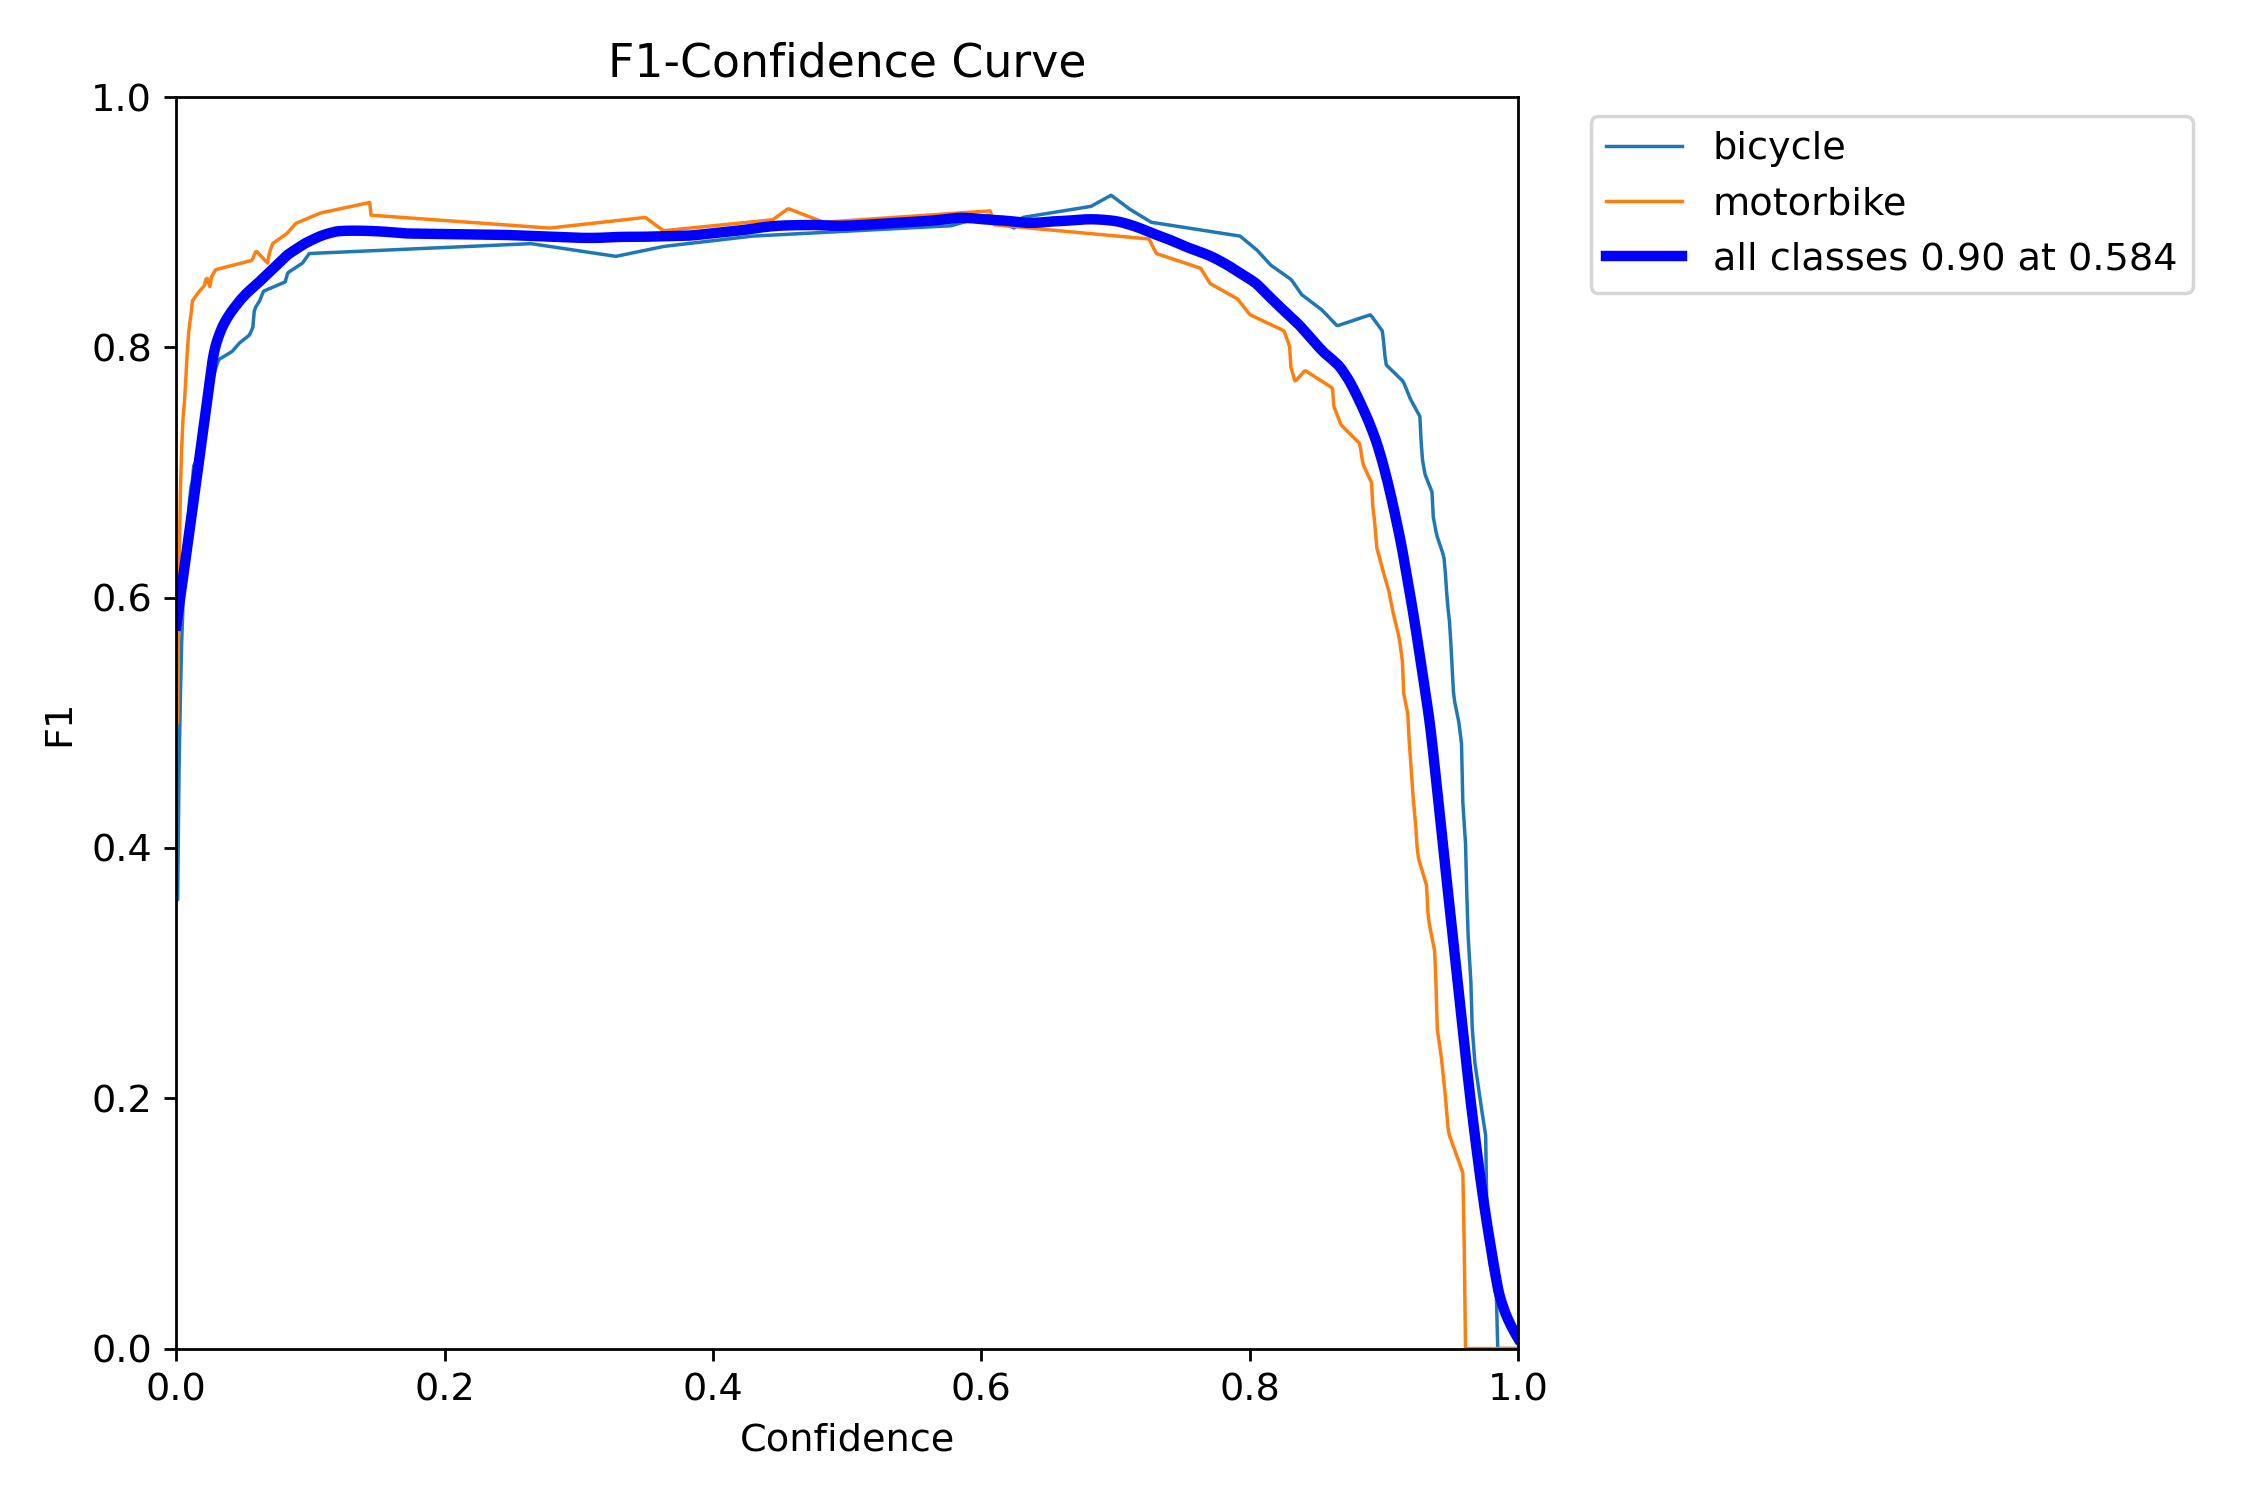

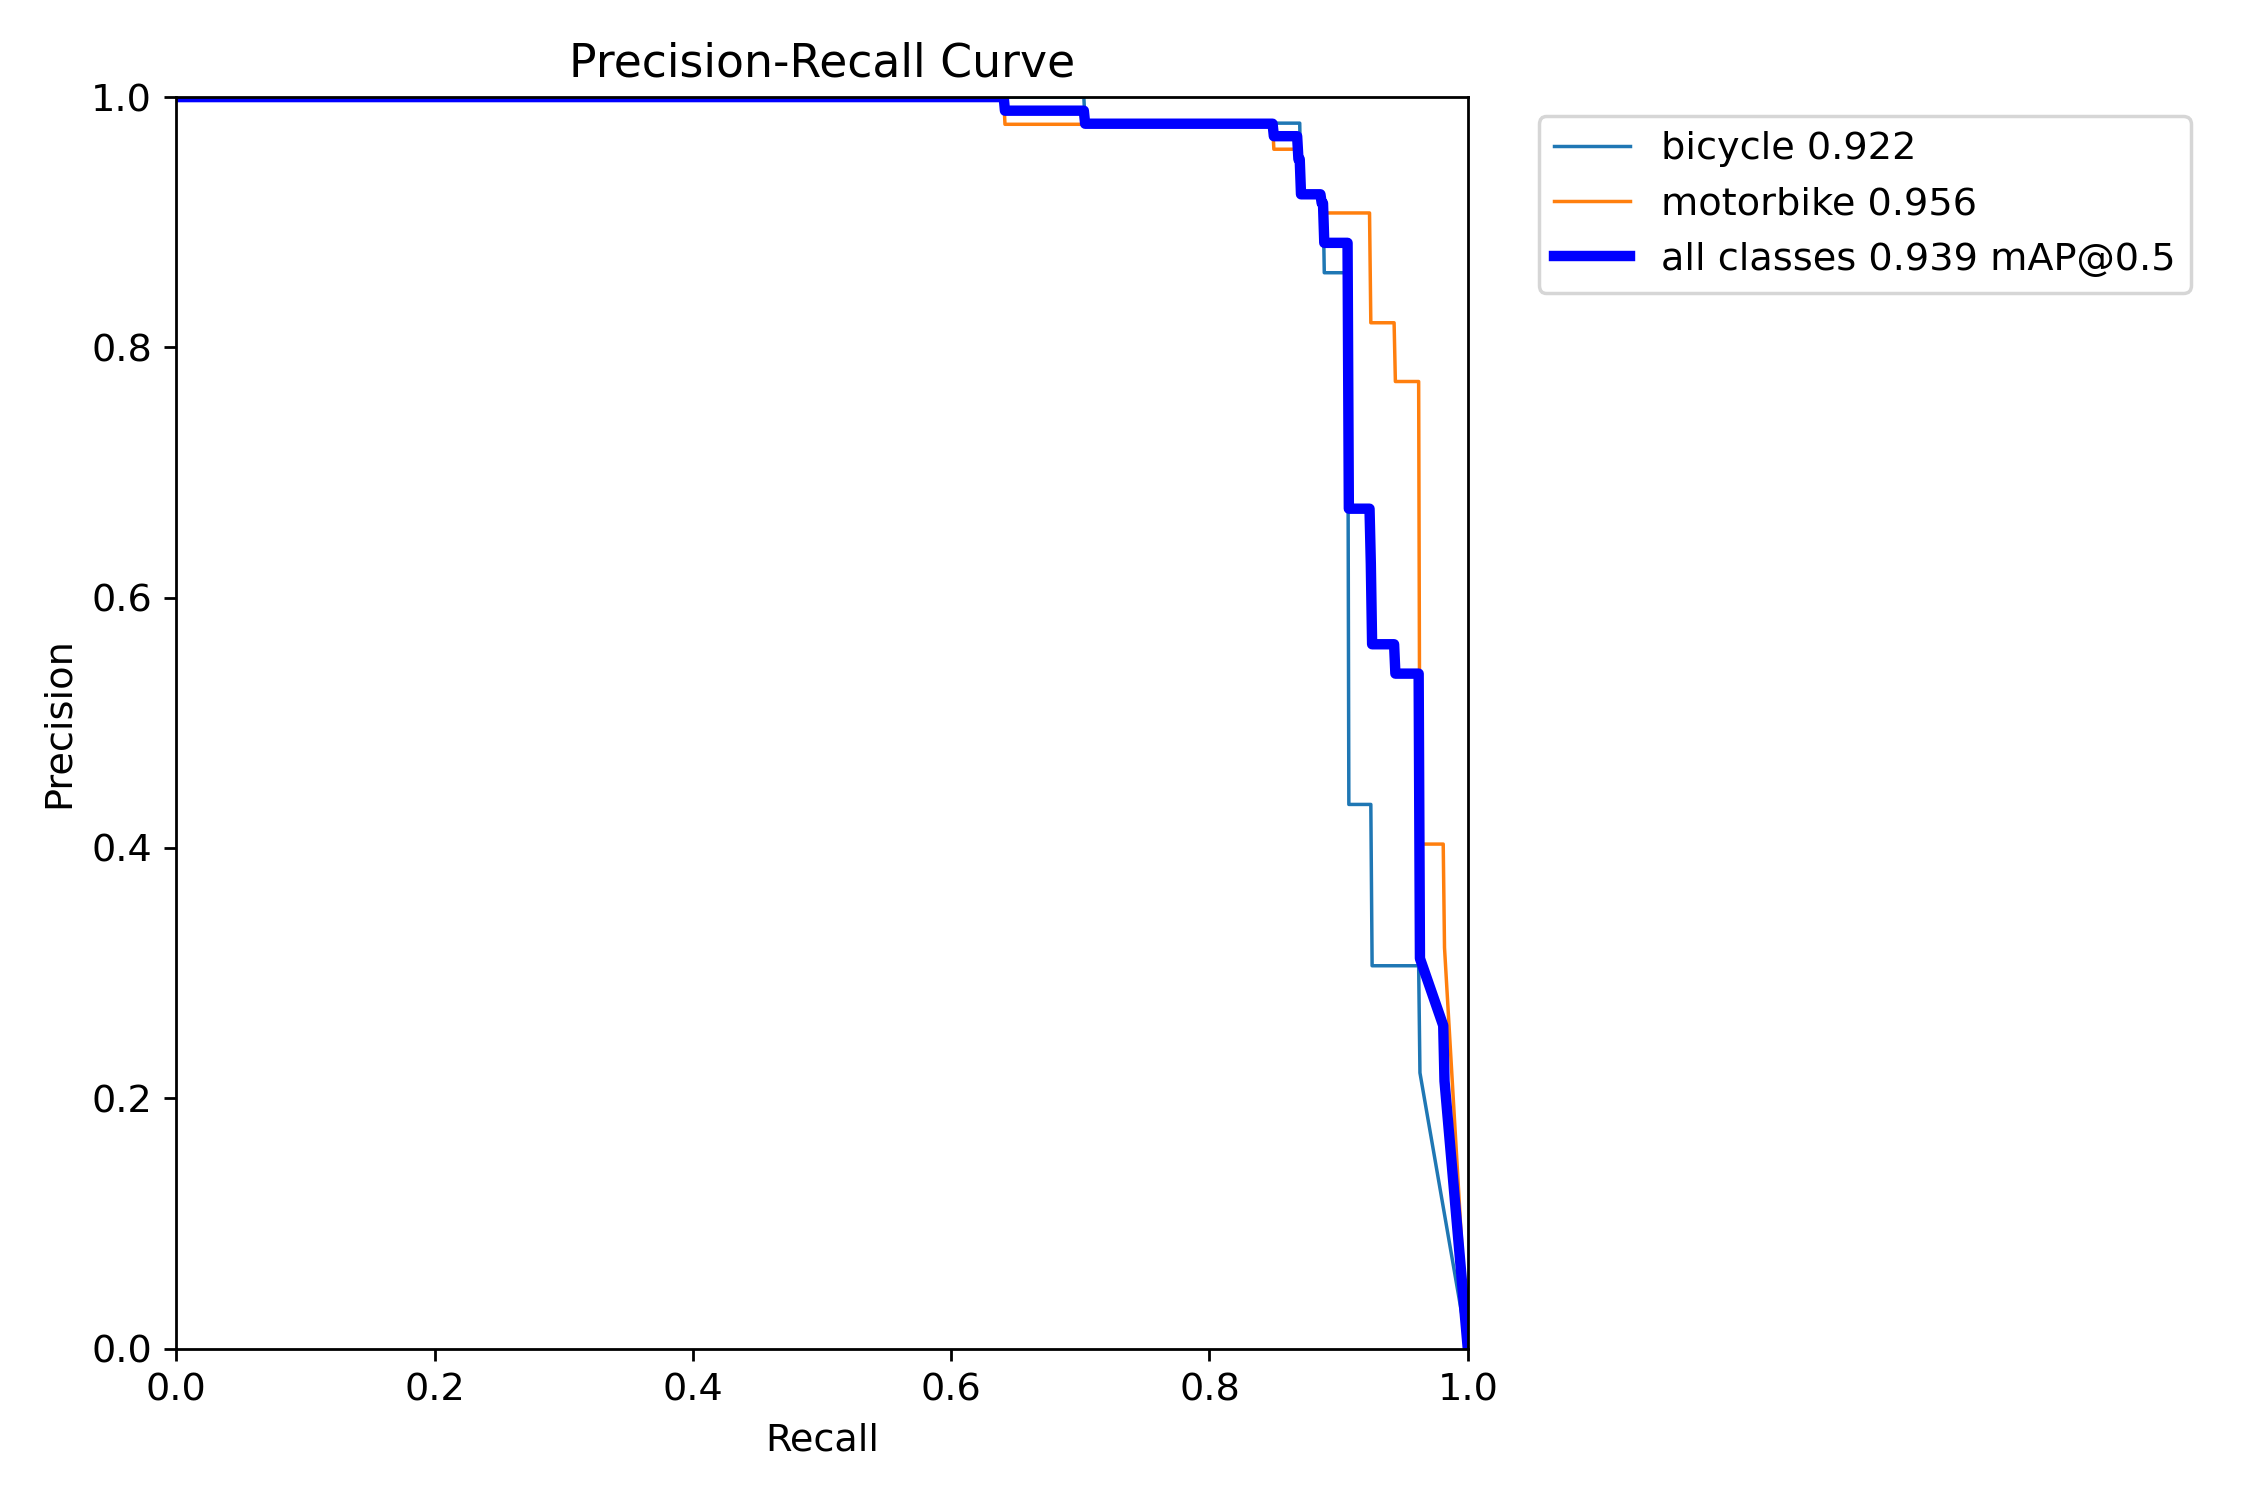

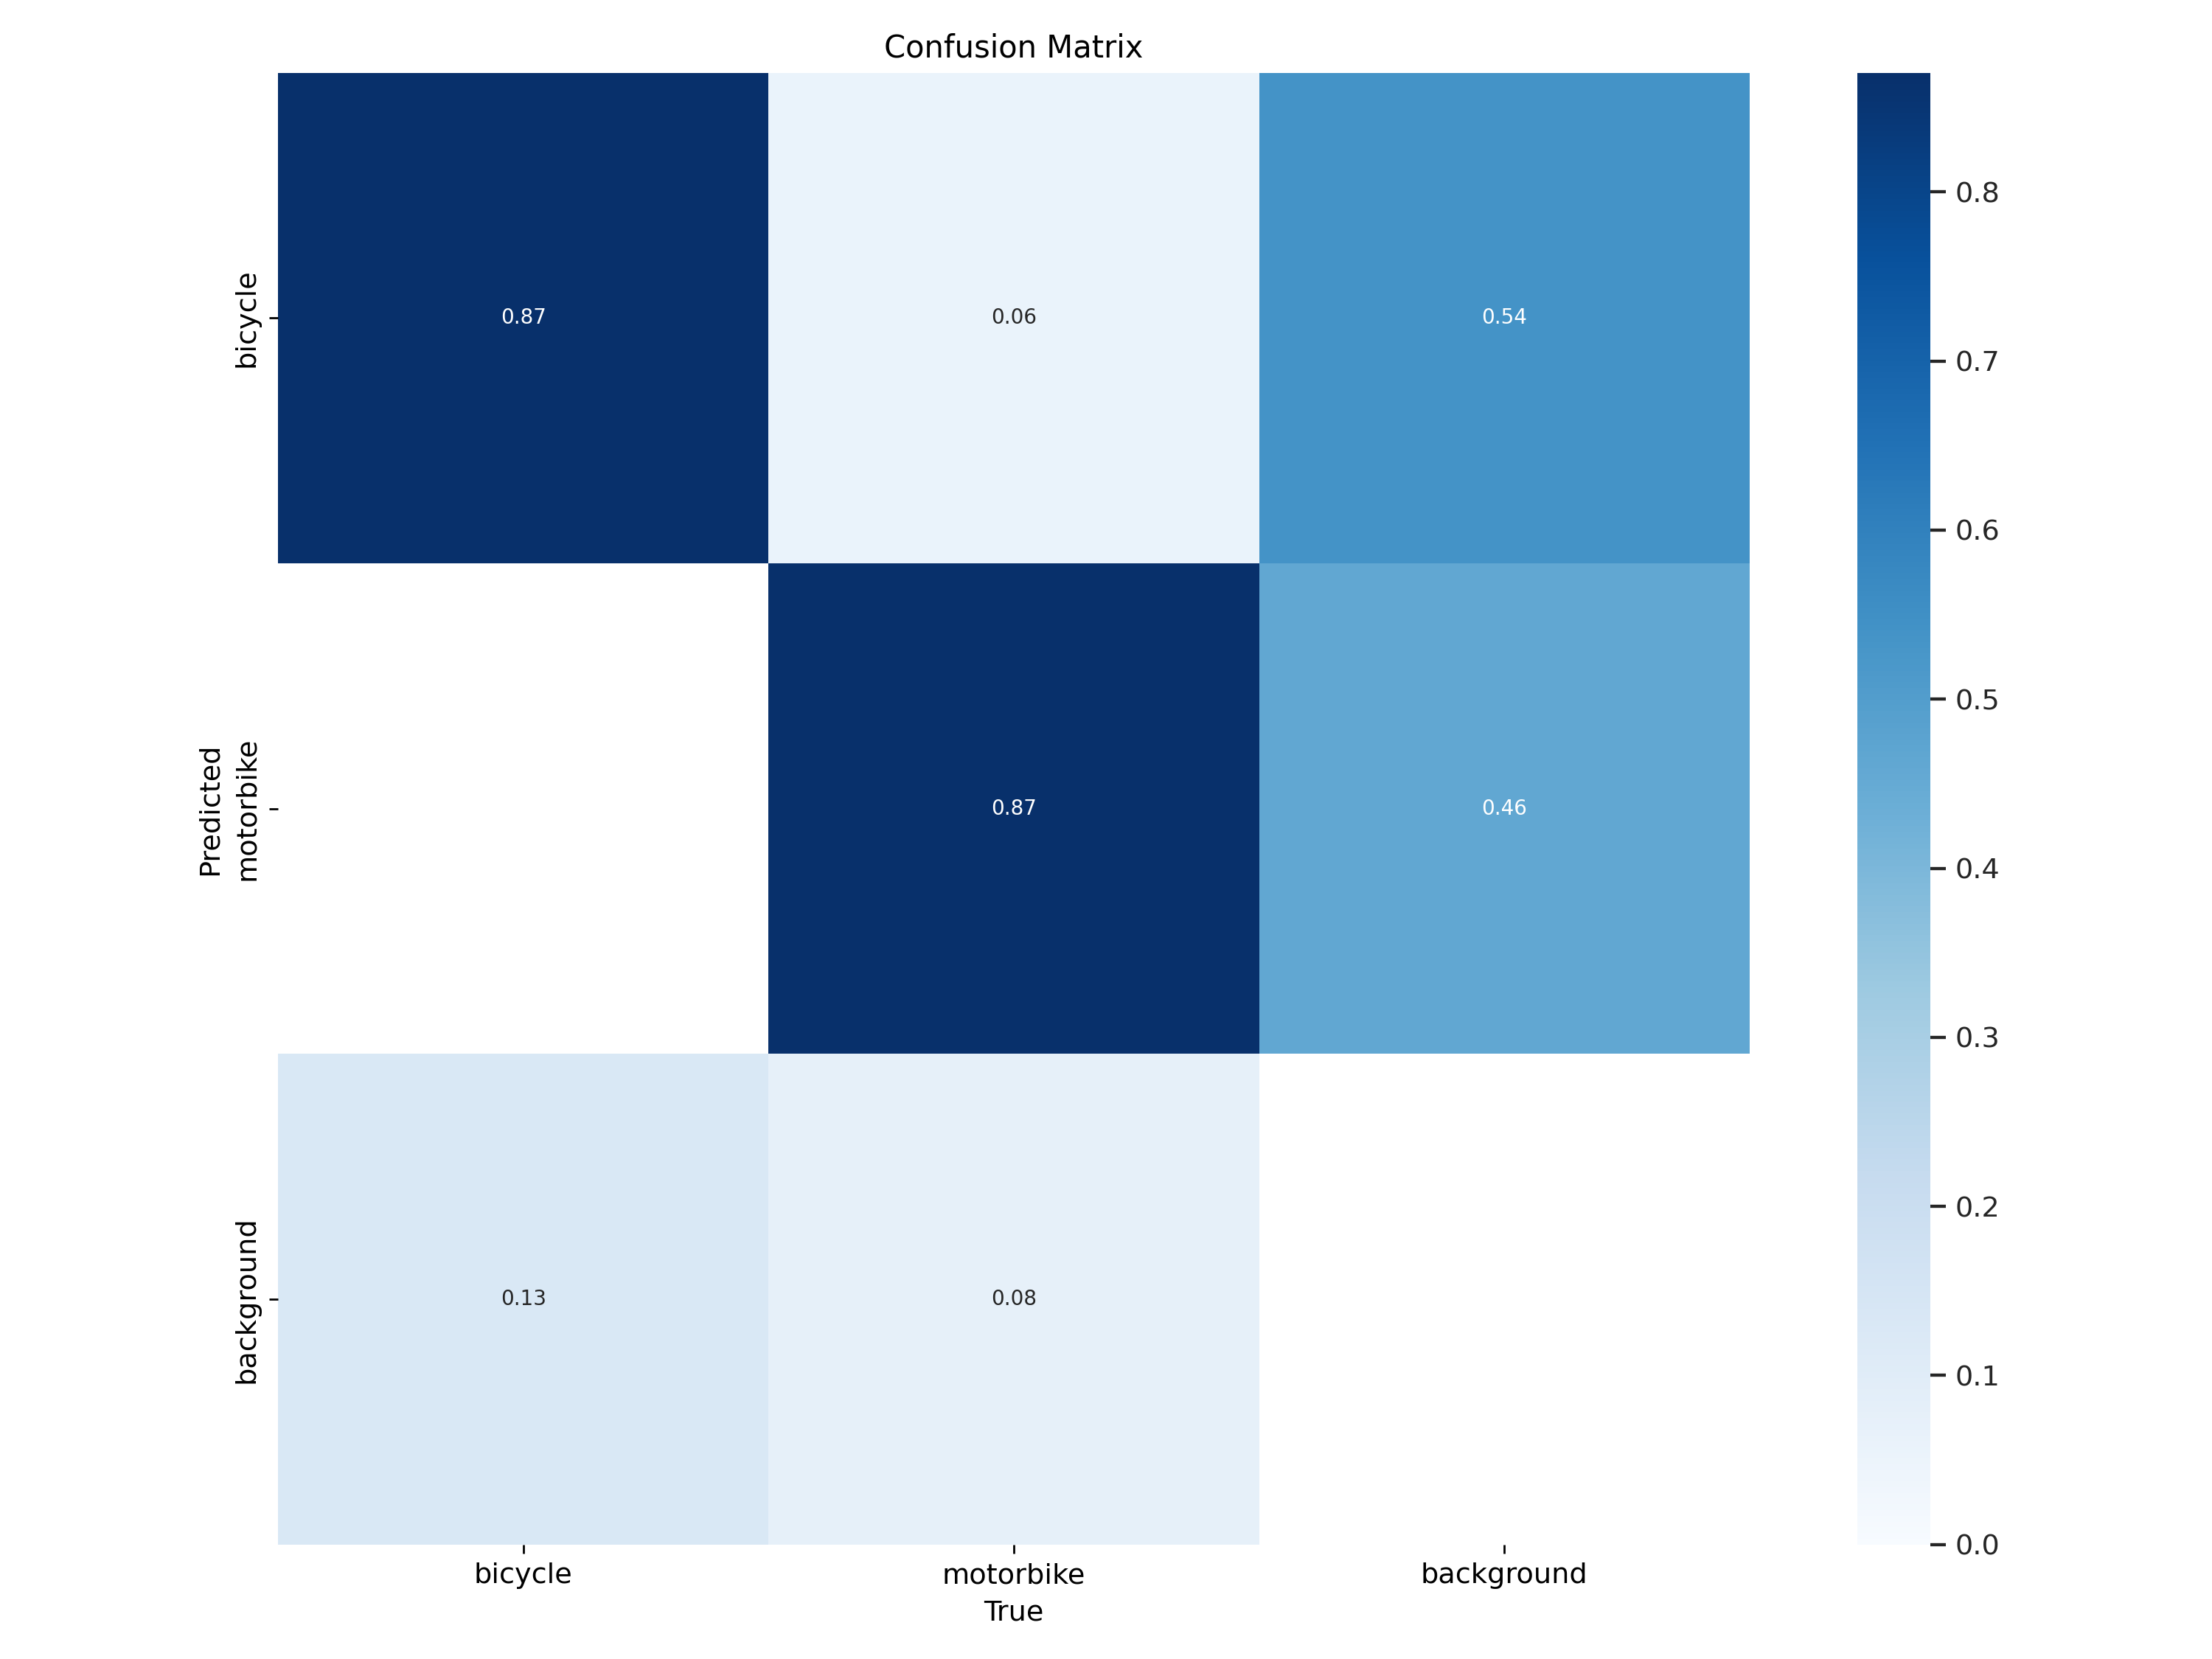

In [9]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png') 
y = Image(filename='runs/detect/train/PR_curve.png') 
z = Image(filename='runs/detect/train/confusion_matrix.png') 
display(x, y,z)

In [16]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [21]:
import locale
print(locale.getpreferredencoding())

ANSI_X3.4-1968


In [22]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [26]:
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="/content/bike/bike/test/images/161.jpg"

Ultralytics YOLOv8.0.87 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/bike/bike/test/images/161.jpg: 640x640 1 bicycle, 37.5ms
Speed: 0.8ms preprocess, 37.5ms inference, 149.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


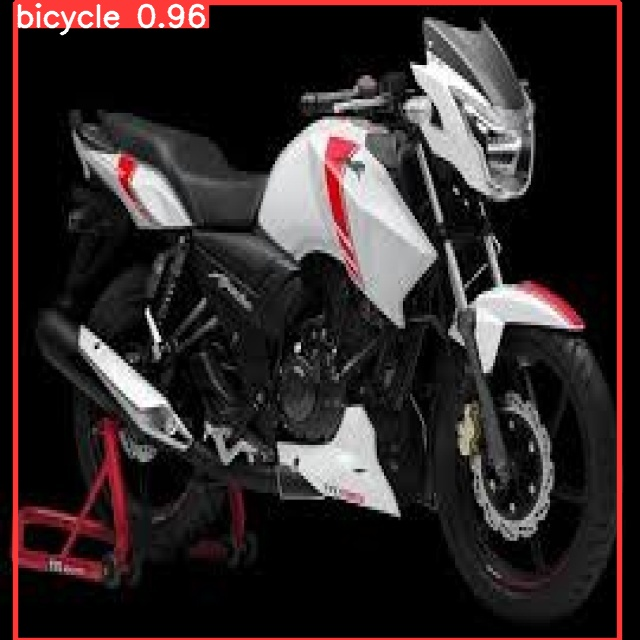

In [27]:
x = Image(filename='/content/runs/detect/predict/161.jpg')
display(x)

In [25]:
!zip -r '/content/run.zip' '/content/runs/detect'

updating: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 5%)
  adding: content/runs/detect/val/F1_curve.png (deflated 13%)
  adding: content/runs/detect/val/PR_curve.png (deflated 20%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 8%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/val/R_curve.png (deflated 14%)
  adding: content/runs/detect/val/P_curve.png (deflated 17%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 5%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 8%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 5%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/results.csv (deflated 84%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 

In [28]:
from google.colab import files
files.download("/content/run.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>